# Compare ROH between groups
Load empirical ROH Dataframe, and compare ROH sharing between groups.
Assumes data is ROH analyzed, and pre-processed (into one dataframe, with region and clst Columns set.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import socket
import os as os
import sys as sys
import multiprocessing as mp

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
from scipy.stats import mannwhitneyu

os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

midway2-0401.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


### Test Mann Whitney U Test

In [66]:
%%time
reps = 1000
mean1, mean2 = 1.0, 50.0
s1, s2 = 2, 20
std1, std2 = 1.0, 10.0

p = np.zeros(reps)

for i in range(reps):
    x = np.random.normal(loc=mean1, scale=std1, size=s1)
    y = np.random.normal(loc=mean2, scale=std2, size=s2)
    p[i] = mannwhitneyu(x, y)[1]

CPU times: user 301 ms, sys: 2.34 ms, total: 304 ms
Wall time: 301 ms


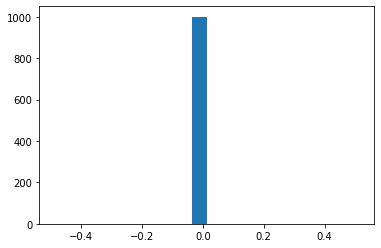

In [67]:
plt.figure()
ax = plt.gca()
ax.hist(p, bins=20)
plt.show()

### Apply to empirical Data

In [81]:
### Load Big Data Frame (only ancients)
df = pd.read_csv("./Empirical/roh_all_inds.csv", sep='\t')
df = df[df["age"]>0]
df["sum_roh_4-8"] = df["sum_roh>4"] - df["sum_roh>8"]

In [101]:
def test_mwu(df, region="Iberia", clst1="Early Neolithic", clst2="Neolithic", col="sum_roh_4-8"):
    """MWann Whitney U-Test. Print and return
    df: Dataframe to test on"""
    df_t = df[df["region"]==region]
    print(f"Loaded {len(df_t)} Samples from Region {region}")
    df1 = df_t[df_t["clst"]==clst1]
    df2 = df_t[df_t["clst"]==clst2]

    print(f"Loaded {len(df1)} Samples from clst {clst1}")
    print(f"Loaded {len(df2)} Samples from clst {clst2}")

    test = mannwhitneyu(df1[col], df2[col])
    print(test)
    return test

In [85]:
mannwhitneyu(df1["sum_roh_4-8"], df2["sum_roh_4-8"])

MannwhitneyuResult(statistic=0.0, pvalue=0.008021976068646297)

In [107]:
for reg in ["Iberia", "Balkans", "Rome", "Central Europe", "Black Sea", "Baltic Sea"]:
    test_mwu(df, region=reg, clst1="Mesolithic", clst2="Early Neolithic")
    test_mwu(df, region=reg, clst1="Early Neolithic", clst2="Neolithic")
    test_mwu(df, region=reg, clst1="Mesolithic", clst2="Neolithic")
    print("\n")

Loaded 134 Samples from Region Iberia
Loaded 7 Samples from clst Mesolithic
Loaded 6 Samples from clst Early Neolithic
MannwhitneyuResult(statistic=19.0, pvalue=0.41516212882789766)
Loaded 134 Samples from Region Iberia
Loaded 6 Samples from clst Early Neolithic
Loaded 24 Samples from clst Neolithic
MannwhitneyuResult(statistic=16.0, pvalue=0.0019335151809012796)
Loaded 134 Samples from Region Iberia
Loaded 7 Samples from clst Mesolithic
Loaded 24 Samples from clst Neolithic
MannwhitneyuResult(statistic=10.0, pvalue=0.0002461920026151975)


Loaded 158 Samples from Region Balkans
Loaded 37 Samples from clst Mesolithic
Loaded 12 Samples from clst Early Neolithic
MannwhitneyuResult(statistic=142.0, pvalue=0.032273361794745783)
Loaded 158 Samples from Region Balkans
Loaded 12 Samples from clst Early Neolithic
Loaded 32 Samples from clst Neolithic
MannwhitneyuResult(statistic=146.0, pvalue=0.11456653385781473)
Loaded 158 Samples from Region Balkans
Loaded 37 Samples from clst Mesolithic
Loa

/home/hringbauer/.local/lib/python3.7/site-packages/scipy/stats/stats.py:5700: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
